# Advanced Exploration of Embeddings and Poisoining 
Embeddings are multi-dimensional arrays but we can use dimentionality reducton and ceate spacial representations to help both devise attacks and defences. This notebook provides an introduction on key techniques to use

In [1]:
import numpy as np
import pandas as pd

### Load the reviews and their embeddings

In [2]:
# Load the embeddings and RAG dataset
embeddings_file = 'data/user_reviews_embeddings.npy'  
dataset_file = 'data/ingredients_reviews.csv' 
embeddings = np.load(embeddings_file)
df = pd.read_csv(dataset_file)
# Combine ingredient names and comments
df["combined"]= df['ingredient'] + " " + df['user_comments']
texts = df['ingredient'] + " " + df['user_comments']  
# print dimensions and a preview of embeddings
print(embeddings.shape, df.shape, texts.shape)
embeddings

(300, 384) (300, 7) (300,)


array([[ 0.01439031, -0.02884273, -0.00862222, ..., -0.04675367,
        -0.04305806,  0.02222505],
       [ 0.01482149, -0.00256585, -0.03337038, ..., -0.04499413,
         0.00480399,  0.00506498],
       [-0.01696833, -0.01576925, -0.0193833 , ..., -0.04717764,
         0.011865  ,  0.03011683],
       ...,
       [-0.03108813,  0.04685389, -0.017752  , ..., -0.04165076,
         0.03172582,  0.05615791],
       [ 0.01549899,  0.05016519, -0.01302617, ...,  0.03957285,
        -0.0093042 ,  0.02950375],
       [ 0.02622023,  0.04862951, -0.01389729, ..., -0.021152  ,
        -0.02356056,  0.07491554]], dtype=float32)

In [9]:
# let's see what the first ingredient and its embedding look like
print(texts[0])
print(embeddings[0].shape)
embeddings[0]


almond flour Use as a food suplement to help reduce cholesterol.
(384,)


array([ 1.43903112e-02, -2.88427342e-02, -8.62222072e-03,  3.52072828e-02,
       -1.07463766e-02, -3.11377645e-02, -3.61627266e-02, -2.60767732e-02,
        1.72908176e-02,  1.26547217e-02,  1.33588072e-02, -2.63592675e-02,
       -6.03433140e-02, -2.93650702e-02, -1.08322008e-02, -7.52078891e-02,
        6.22337535e-02, -4.79534231e-02, -3.94891426e-02, -3.89625803e-02,
        6.79896697e-02, -9.32448450e-03,  4.52424623e-02,  1.70377956e-03,
        2.72801947e-02,  5.60613871e-02,  4.87932041e-02, -1.92639511e-02,
       -1.93880387e-02, -6.70818239e-02,  1.85832996e-02,  5.60592860e-02,
        8.00329819e-03, -4.52788770e-02, -3.51049751e-02,  5.69028454e-03,
       -2.52594370e-02, -1.01292379e-01,  1.81002282e-02, -5.79196252e-02,
        2.92486399e-02,  6.34097233e-02,  1.03217155e-01, -6.56599328e-02,
       -2.83035375e-02, -1.21830078e-03,  8.48450065e-02,  3.73089686e-04,
        1.03384890e-01, -4.22240682e-02, -2.21418496e-02,  1.61423255e-02,
        9.74663161e-03, -

### Visualise embeddings using two popular dimensionality reduction techniques: PCA and t-SNE

/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


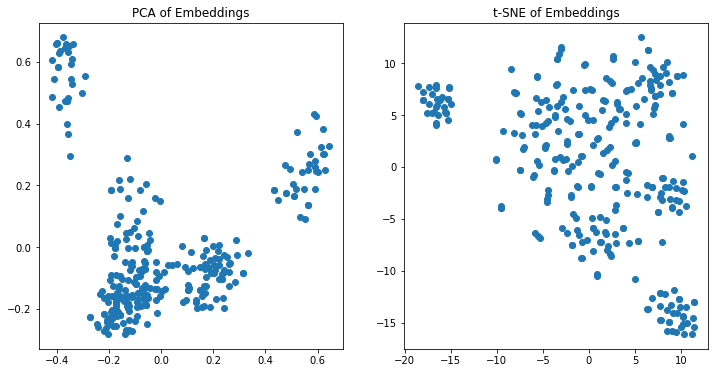

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Embeddings')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE of Embeddings')

plt.show()



#### Visualise subsets of embeddings and understand their spatial relationships

In [5]:
# Find indices for "beef "
beef_indices = df[df['ingredient'].str.contains('beef', case=False, na=False)].index
# Find indices for "cholesterol" mentions
cholesterol_indices = df[df['user_comments'].str.contains('cholesterol', case=False, na=False)].index
beef_embeddings = embeddings[beef_indices]
cholesterol_embeddings = embeddings[cholesterol_indices]

/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/

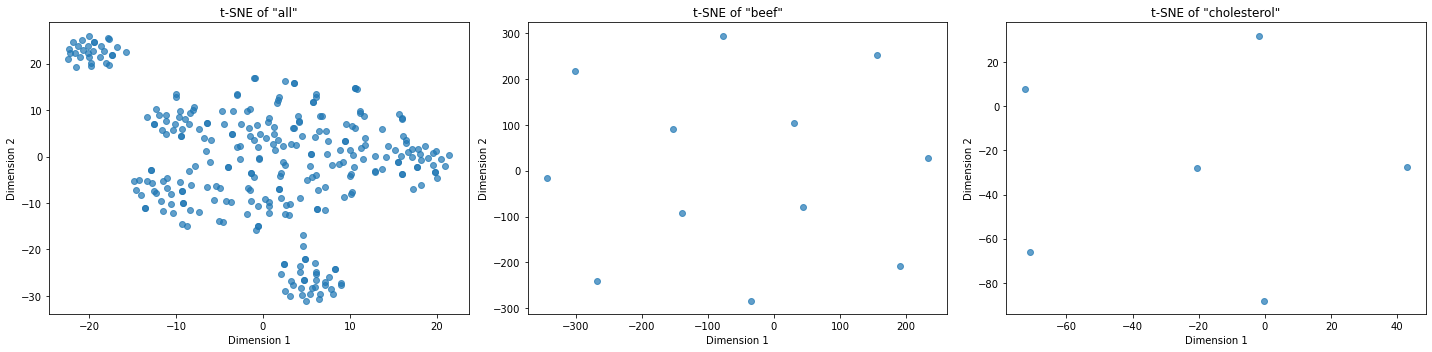

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import math

def visualise_embeddings(embeddings_array, titles_array):
    # Number of embeddings and titles should match
    assert len(embeddings_array) == len(titles_array), "Embeddings and titles array must have the same length"
    
    # Calculate the number of rows needed for subplots (with a max of 4 per row)
    n = len(embeddings_array)
    nrows = math.ceil(n / 4)
    ncols = min(n, 4)
    
    # Create a figure for the subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
    
    # Flatten the axes array for easy indexing, in case of a single row
    if nrows == 1:
        axes = np.array([axes]).flatten()
    else:
        axes = axes.flatten()
    
    for i, (sample_embeddings, embeddings_name) in enumerate(zip(embeddings_array, titles_array)):
        # Determine a suitable perplexity value (less than the number of samples)
        perplexity_value = min(30, len(sample_embeddings) - 1)
        
        # Apply t-SNE with the adjusted perplexity
        tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
        embeddings_reduced = tsne.fit_transform(sample_embeddings)
        
        # Plot on the ith subplot
        ax = axes[i]
        ax.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], alpha=0.7)
        ax.set_title(f't-SNE of "{embeddings_name}"')
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
    
    # Hide any unused axes if the number of plots is not a multiple of 4
    for j in range(i + 1, nrows * ncols):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
beef_embeddings = embeddings[beef_indices]
cholesterol_embeddings = embeddings[cholesterol_indices]
visualise_embeddings([embeddings, beef_embeddings, cholesterol_embeddings],["all","beef","cholesterol"])

### Visualise the effects of poisoning
See how entries move in to the embeddings space. This allows to visualise and spot poisoning, but also for attackers how to shift embeddings slightly without being detected

/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


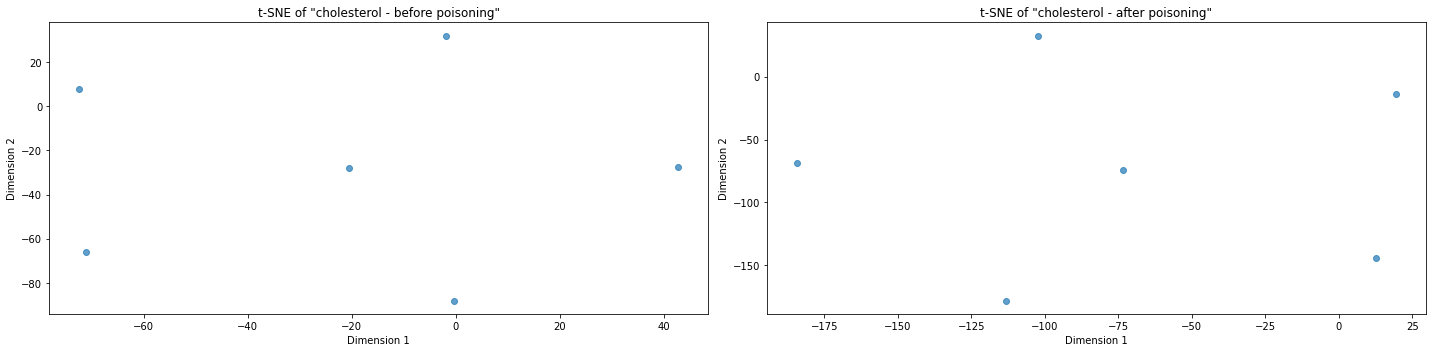

In [8]:
# For demonstration, use the average embedding of "beef" as the target for poisoning
average_beef_embedding = np.mean(embeddings[beef_indices], axis=0)
poisoned_embeddings= embeddings.copy()
# Poison the "cholesterol" embeddings
for chol_index in cholesterol_indices:
    poisoned_embeddings[chol_index] = average_beef_embedding
poisoned_cholerstor_embeddings = poisoned_embeddings[cholesterol_indices]
visualise_embeddings([cholesterol_embeddings, poisoned_cholerstor_embeddings],["cholesterol - before poisoning", "cholesterol - after poisoning"])

### Explore clusters in embeddings spatial represenation to find susceptible clusters 
By visually inspecting embeddings representations we can identify clusters that we can exploit by shifting items from one cluster to another. 
In the sample below we show how to begin this by identifying the items associated to areas containing clusters 

/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


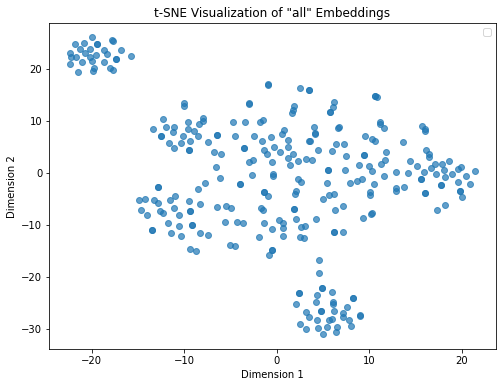

In [14]:
# Let's visualise the embeddings of all ingredients again to visually isnspect for clusters

def on_click(event):
    # work in progress and experimental attempt to identify the points clicked in the plot
    # Event handler to print the coordinates of points clicked in the plot
    if event.xdata is not None and event.ydata is not None:  # Click is inside the axes
        print(f'x = {event.xdata:.2f}, y = {event.ydata:.2f}')
       


def visualise_embeddings_single(sample_embeddings, embeddings_name):
    # Determine a suitable perplexity value (less than the number of samples)
    perplexity_value = min(30, len(sample_embeddings) - 1)  # Default is 30, adjust if fewer samples
    
    # Apply t-SNE with the adjusted perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    embeddings_reduced = tsne.fit_transform(sample_embeddings)
    
    # Create a figure and a plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], alpha=0.7)
    ax.set_title(f't-SNE of "{embeddings_name}"')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
        
    # Connect the event handler to the figure
    fig.canvas.mpl_connect('button_press_event', on_click)
    
    # Finalize the plot
    plt.title(f't-SNE Visualization of "{embeddings_name}" Embeddings')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

# Assuming 'embeddings' is defined
visualise_embeddings_single(embeddings, "all") 


### Reverse-Engineer/Identify Items from Visual Inspection

In [12]:
from sklearn.metrics.pairwise import euclidean_distances

perplexity_value = min(30, len(embeddings) - 1)  # Default is 30, adjust if fewer samples
   
# Apply t-SNE with the adjusted perplexity
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
embeddings_reduced = tsne.fit_transform(embeddings)
 
tozp_left_cluster_center = (-30, -22)  # These are example coordinates
bottom_right_cluster_center = (-35, -20)

# Calculate distances from these points to all points in your t-SNE result
distances_top_left = euclidean_distances(embeddings_reduced, [top_left_cluster_center])
distances_bottom_right = euclidean_distances(embeddings_reduced, [bottom_right_cluster_center])

# Find the index of the minimum distance
index_top_left = distances_top_left.argmin()
index_bottom_right = distances_bottom_right.argmin()

# Retrieve the corresponding items from the original data
item_top_left = df['ingredient'].iloc[index_top_left]
item_bottom_right = df['ingredient'].iloc[index_bottom_right]

print("Item in the top left cluster:", item_top_left)
print("Item in the bottom right cluster:", item_bottom_right)


/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Item in the top left cluster: beef stir fry strips
Item in the bottom right cluster: beef stir fry strips


In [34]:
# Coordinates of top-left and bottom-right items (obtained through visual inspection)
def identify_cluster_items(original_data, tsne_results, x_top_left, y_top_left, x_bottom_right, y_bottom_right):
    top_left_cluster= (20, 30)  
    bottom_right_cluster = (-25, 10)

    # Define bounding box edges
    x_min = min(x_top_left, x_bottom_right)
    x_max = max(x_top_left, x_bottom_right)
    y_min = min(y_top_left, y_bottom_right)
    y_max = max(y_top_left, y_bottom_right)

    x_min = min(top_left_cluster[0], bottom_right_cluster[0])
    x_max = max(top_left_cluster[0], bottom_right_cluster[0])
    y_min = min(top_left_cluster[1], bottom_right_cluster[1])
    y_max = max(top_left_cluster[1], bottom_right_cluster[1])


    x_min = min(top_left_cluster[0], bottom_right_cluster[0])
    x_max = max(top_left_cluster[0], bottom_right_cluster[0])
    y_min = min(top_left_cluster[1], bottom_right_cluster[1])
    y_max = max(top_left_cluster[1], bottom_right_cluster[1])

    # List to store the indices of items within the bounding box
    inside_indices = []

    # Iterate through t-SNE results and check if they fall within the bounding box
    for i, (x, y) in enumerate(tsne_results):
        if x_min <= x <= x_max and y_min <= y <= y_max:
            
            inside_indices.append(i)

    # Retrieve the original items using the indices
    original_items_inside_box = original_data.iloc[inside_indices]
    return original_items_inside_box

top_cluster = identify_cluster_items(df, embeddings_reduced, -20, -22, -35, -20)
print(top_cluster.shape)
print(top_cluster[["ingredient","user_comments"]])

(53, 7)
                   ingredient  \
1                almond flour   
2                almond flour   
4                     almonds   
5                     almonds   
18                 beef stock   
19                 beef stock   
21                  beetroots   
57           cauliflower rice   
58           cauliflower rice   
59           cauliflower rice   
64              chicken wings   
72              dijon mustard   
83                        egg   
92                      farro   
93                   game hen   
95                   game hen   
105              gouda cheese   
118                   gurnard   
121           habanero pepper   
126             haricot beans   
129            havarti cheese   
141                      lamb   
144                lamb stock   
146                lamb stock   
152                   lentils   
154                   lettuce   
155                   lettuce   
159                 mandarins   
160                 mandarins   
17

##### We could now use the identified items and experiment moving them to the another cluster 